In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

## 20Newsgroups

In [3]:
from sklearn.datasets import fetch_20newsgroups

In [4]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [5]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [6]:
print (newsgroups_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







### 1. Предварительная обработка текста

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')  
nltk.download('punkt_tab')  

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\s-hro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\s-hro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\s-hro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [11]:
def preprocess_text(texts):
    stop_words = set(stopwords.words('english'))
    regex = re.compile('[^a-z A-Z]')
    preprocess_texts = []
    for i in  tqdm.tqdm(range(len(texts))):
        text = texts[i].lower()
        text = regex.sub(' ', text)
        word_tokens = word_tokenize(text)
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        preprocess_texts.append( ' '.join(filtered_sentence))

    return preprocess_texts


In [12]:
newsgroups_train['preprocess_data'] = preprocess_text(newsgroups_train.data)


100%|██████████| 11314/11314 [00:06<00:00, 1693.31it/s]


In [13]:
newsgroups_train['preprocess_data'] = preprocess_text(newsgroups_train.data)

100%|██████████| 11314/11314 [00:06<00:00, 1705.31it/s]


In [14]:
newsgroups_test['preprocess_data'] = preprocess_text(newsgroups_test.data)

100%|██████████| 7532/7532 [00:04<00:00, 1822.32it/s]


In [22]:
print(newsgroups_train['preprocess_data'][0])

lerxst wam umd edu thing subject car nntp posting host rac wam umd edu organization university maryland college park lines wondering anyone could enlighten car saw day door sports car looked late early called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please e mail thanks il brought neighborhood lerxst


In [23]:
from nltk.stem.lancaster import LancasterStemmer

In [24]:
def stemming_texts(texts):
  st = LancasterStemmer()
  stem_text = []
  for text in tqdm.tqdm(texts):
    word_tokens = word_tokenize(text)
    stem_text.append(' '.join([st.stem(word) for word in word_tokens]))
  return stem_text

In [25]:
newsgroups_train['data_stemming'] = \
                           stemming_texts(newsgroups_train.preprocess_data)

100%|██████████| 11314/11314 [00:17<00:00, 643.06it/s]


In [26]:
newsgroups_test['data_stemming'] = \
                            stemming_texts(newsgroups_test.preprocess_data)

100%|██████████| 7532/7532 [00:11<00:00, 655.07it/s]


In [30]:
print(newsgroups_train.preprocess_data[0])

lerxst wam umd edu thing subject car nntp posting host rac wam umd edu organization university maryland college park lines wondering anyone could enlighten car saw day door sports car looked late early called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please e mail thanks il brought neighborhood lerxst


In [31]:
print(newsgroups_train.data_stemming[0])

lerxst wam umd edu thing subject car nntp post host rac wam umd edu org univers maryland colleg park lin wond anyon could enlight car saw day door sport car look lat ear cal bricklin door real smal addit front bump sep rest body know anyon tellm model nam engin spec year produc car mad hist whatev info funky look car pleas e mail thank il brought neighb lerxst


### 2. Перевод текста в вещественное пространство признаков

#### 2.1 Bag of Words (мешок слов)

Основное предположение данного метода — порядок слов в документе не важен,

а все документы представляются в виде матрицы $ T = (t)_{d,w}$,

каждая строка в которой соответствует отдельному документу или тексту,

а каждый столбец — определенному слову.

Элемент $t_{d,w}$ соответствует количеству вхождений слова $w$ в документ $d$.







In [86]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [87]:
vectorizer = CountVectorizer()

In [88]:
documents = ["метод для восстановления зависимости между двумя переменными","статистический метод используемый для задач","набор алгоритмов обучения с учителем используемый для задач"]

In [100]:
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(documents)
feature_names_count = count_vectorizer.get_feature_names_out()
print("CountVectorizer feature names:", feature_names_count)
print("CountVectorizer document-term matrix:")
print(X_count.toarray())
print(X_count.toarray().shape)

CountVectorizer feature names: ['алгоритмов' 'восстановления' 'двумя' 'для' 'зависимости' 'задач'
 'используемый' 'между' 'метод' 'набор' 'обучения' 'переменными'
 'статистический' 'учителем']
CountVectorizer document-term matrix:
[[0 1 1 1 1 0 0 1 1 0 0 1 0 0]
 [0 0 0 1 0 1 1 0 1 0 0 0 1 0]
 [1 0 0 1 0 1 1 0 0 1 1 0 0 1]]
(3, 14)


In [98]:
sorted_weights = sorted(zip(X_tfidf()[1], feature_names_tfidf), reverse=True)

TypeError: 'csr_matrix' object is not callable

In [34]:
vectorizer.fit(['порядок слов в документе не важен', 'мешок слов'])
# обучаем на 2-х документах типа

CountVectorizer()

In [36]:
vectorizer.get_feature_names_out()

array(['важен', 'документе', 'мешок', 'не', 'порядок', 'слов'],
      dtype=object)

In [37]:
vectorizer.transform(['важен порядок', 'не мешок не порядок']).toarray()

array([[1, 0, 0, 0, 1, 0],
       [0, 0, 1, 2, 1, 0]])

In [38]:
def bow(vectorizer, train, test):
  train_bow = vectorizer.fit_transform(train)
  test_bow = vectorizer.transform(test)
  return train_bow, test_bow

In [39]:
X_train_bow, X_test_bow = bow(vectorizer,
                              newsgroups_train.data,
                              newsgroups_test.data)

In [40]:
X_train_bow.shape

(11314, 130107)

In [41]:
X_test_bow.shape

(7532, 130107)

In [42]:
X_train_bow_preprocess, X_test_bow_preprocess = bow(vectorizer,
                                                    newsgroups_train.preprocess_data,
                                                    newsgroups_test.preprocess_data)

In [43]:
X_train_bow_preprocess.shape

(11314, 88863)

In [44]:
X_test_bow_preprocess.shape

(7532, 88863)

In [45]:
X_train_bow_stem, X_test_bow_stem = bow(vectorizer,
                                        newsgroups_train.data_stemming,
                                        newsgroups_test.data_stemming)

In [46]:
X_train_bow_stem.shape

(11314, 61221)

In [47]:
X_test_bow_stem.shape

(7532, 61221)

#### 2.2 Bag of Words & TF IDF

$TF-IDF$ — это статистическая мера, используемая для оценки

важности слова в контексте документа. Вычисляется по формуле:

$$TF-IDF(w, d, D) = TF(w, d) × IDF(w, D)$$

$TF$ — частота слова, оценивает важность слова $w_i$ в пределах отдельного документа.

$$TF(w, d) = \frac{n_i}{\sum_k n_k}$$

$n_i$ — число вхождений слова $i$ в документ.

$\sum_k n_k$ — общее число слов в данном документе.

$IDF$ — обратная частота документа.

Учёт $IDF$ уменьшает вес широко употребляемых слов.
$$IDF(w, D) = \log \frac{|D|}{|w_i \subset d_i|}, \text{где}$$

$|D|$ — количество документов в корпусе.

$|w_i \subset d_i|$ — количество документов,

в которых встречается слово $w_i$.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
vectorizer_tf_idf = TfidfVectorizer()

In [50]:
X_train_tfidf, X_test_tfidf = bow(vectorizer_tf_idf,
                                  newsgroups_train.data,
                                  newsgroups_test.data)

In [51]:
X_train_tfidf_preprocess, X_test_tfidf_preprocess = bow(vectorizer_tf_idf,
                                                        newsgroups_train.preprocess_data,
                                                        newsgroups_test.preprocess_data)

In [52]:
X_train_tfidf_stem, X_test_tfidf_stem = bow(vectorizer_tf_idf,
                                            newsgroups_train.data_stemming,
                                            newsgroups_test.data_stemming)

In [53]:
vectorizer_ngram = TfidfVectorizer(ngram_range=(1,2))

In [54]:
X_train_ngram_stem, X_test_ngram_stem = bow(vectorizer_ngram,
                                            newsgroups_train.data_stemming,
                                            newsgroups_test.data_stemming)

In [55]:
X_train_ngram_stem.shape

(11314, 934463)

In [56]:
X_test_ngram_stem.shape

(7532, 934463)

### 3. Выбор алгоритма машинного обучения для классификации.

In [57]:
from sklearn.metrics import accuracy_score
import numpy as np

In [63]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(n_jobs=-1)

In [64]:
from sklearn.svm import LinearSVC
clf_svc = LinearSVC()

In [65]:
clf.fit(X_train_bow, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_bow), newsgroups_test.target))

clf_svc.fit(X_train_bow, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_bow), newsgroups_test.target))

LogisticRegression:  0.7889006903876792
LinearSVC:  0.7858470525756771


In [66]:
clf.fit(X_train_bow_preprocess, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_bow_preprocess),
                      newsgroups_test.target))

clf_svc.fit(X_train_bow_preprocess, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_bow_preprocess),
                      newsgroups_test.target))



LogisticRegression:  0.8009824747742963
LinearSVC:  0.7930164630908125


In [67]:
clf.fit(X_train_bow_stem, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_bow_stem),
                      newsgroups_test.target))

clf_svc.fit(X_train_bow_stem, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_bow_stem),
                      newsgroups_test.target))

LogisticRegression:  0.7966011683483802
LinearSVC:  0.781465746149761


In [68]:
clf.fit(X_train_tfidf, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_tfidf), newsgroups_test.target))

clf_svc.fit(X_train_tfidf, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_tfidf), newsgroups_test.target))

LogisticRegression:  0.8278013807753585
LinearSVC:  0.8531598513011153


In [69]:
clf.fit(X_train_tfidf_preprocess, newsgroups_train.target)
print ('LogisticRegression: ',
        accuracy_score(clf.predict(X_test_tfidf_preprocess),
                       newsgroups_test.target))

clf_svc.fit(X_train_tfidf_preprocess, newsgroups_train.target)
print ('LinearSVC: ',
        accuracy_score(clf_svc.predict(X_test_tfidf_preprocess),
                       newsgroups_test.target))

LogisticRegression:  0.8319171534784918
LinearSVC:  0.8509028146574615


In [70]:
clf.fit(X_train_tfidf_stem, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_tfidf_stem),
                      newsgroups_test.target))

clf_svc.fit(X_train_tfidf_stem, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_tfidf_stem),
                      newsgroups_test.target))

LogisticRegression:  0.825942644715879
LinearSVC:  0.8437334041423261


In [71]:
clf.fit(X_train_ngram_stem, newsgroups_train.target)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_ngram_stem),
                      newsgroups_test.target))

clf_svc.fit(X_train_ngram_stem, newsgroups_train.target)
print ('LinearSVC: ',
       accuracy_score(clf_svc.predict(X_test_ngram_stem),
                      newsgroups_test.target))

LogisticRegression:  0.8293945831120553
LinearSVC:  0.8555496548061604


In [73]:
import seaborn
from sklearn.metrics import confusion_matrix

In [74]:
predict_targets = clf_svc.predict(X_test_ngram_stem)

<Axes: >

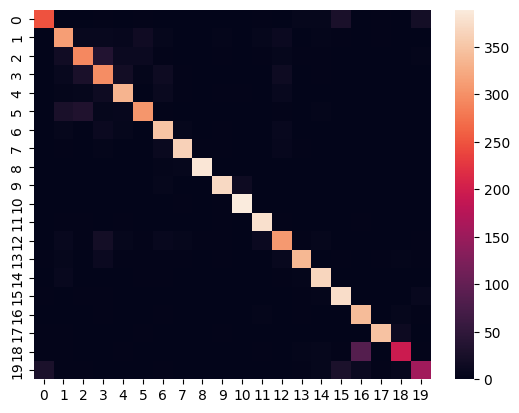

In [75]:
seaborn.heatmap(confusion_matrix(newsgroups_test.target, predict_targets))

In [ ]:
newsgroups_test.target_names[18]

'talk.politics.misc'

In [ ]:
newsgroups_test.target_names[16]

'talk.politics.guns'

In [76]:
ind = np.where(newsgroups_test.target != predict_targets)
ind = ind[0]
random_ind = np.random.randint(0,ind.shape[0],(2))
for i in random_ind:
    img=newsgroups_test.data[ind[i]]
    print ('Правильный класс: ',
           newsgroups_test.target_names[newsgroups_test.target[ind[i]]])
    print ('Предсказанный класс: ',
           newsgroups_test.target_names[predict_targets[ind[i]]])
    print(img)


Правильный класс:  comp.windows.x
Предсказанный класс:  comp.os.ms-windows.misc
From: mark@taylor.uucp (Mark A. Davis)
Subject: Re: Did Microsoft buy Xhibition??
Organization: Lake Taylor Hospital Computer Services
Lines: 39

harden@skate.ics.com (Aub Harden) writes:


>In article <1993May14.191035.19271@vpbuild.vp.com>, jessea@u013.me.vp.com (Jesse W. Asher) writes:
>|> I've been getting mail from Xhibition about the June conference and I was
>|> wondering if Microsoft had bought Xhibition?  The front says "Conference
>|> from Microsoft Windows NT Developers".  What's the deal?  I thought
>|> "X"hibition was for "X-windows"??
>|> 
>|> -- 
>|>       Jesse W. Asher                                          

I was wondering this myself.

>and (not surprisingly when you look at the audience) Windows NT.

>With the bulk of the Xhibition audience (and the UNIX community) developing
>applications for in-house or custom use, a new 32-bit operating system from a
>player as large as Microsoft n